Drop irrelevant columns and standardize 

In [70]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and identifier columns
X_PCA = df.drop(['Discounted Price','Release Date', 'OneHot Encoded Languages', 'OneHot Encoded Tags', 'OneHot Encoded Features'], axis=1)
X_PCA.set_index('GameID')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_PCA)

Apply PCA

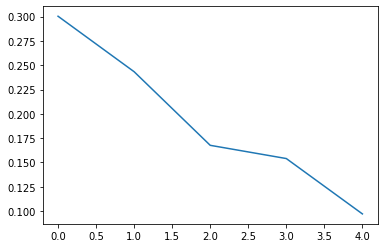

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
        
# Try reduce to 2 dimensions
pca = PCA(n_components=5)
plt.plot(pca.explained_variance_ratio_)

take up to PC 4 to get to 0.9% variance explained


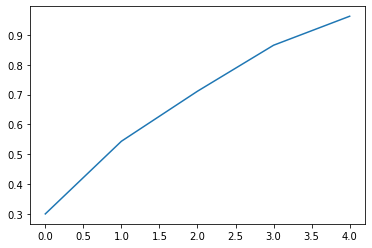

In [89]:
# Select PCs using elbow methods
var_exp_thresh = 0.9
total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp);
pcindex = np.where(total_var_exp>=var_exp_thresh)[0]
print(f'take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')

In [90]:
pca = PCA(n_components=4)
pca_X = pca.fit_transform(X_scaled)

In [91]:
import umap

Process onehot columns

In [98]:
one_hot_languages = pd.DataFrame(df['OneHot Encoded Languages'].tolist(), index=df.index)
one_hot_languages.columns = ['Language_' + str(i) for i in range(one_hot_languages.shape[1])]

one_hot_tags = pd.DataFrame(df['OneHot Encoded Tags'].tolist(), index=df.index)
one_hot_tags.columns = ['Tag_' + str(i) for i in range(one_hot_tags.shape[1])]

one_hot_fea = pd.DataFrame(df['OneHot Encoded Features'].tolist(), index=df.index)
one_hot_fea.columns = ['Feature_' + str(i) for i in range(one_hot_fea.shape[1])]

In [101]:
# Drop irrelevant columns
X_UMAP = df.drop(['GameID','Release Date','Discounted Price','OneHot Encoded Languages','OneHot Encoded Tags','OneHot Encoded Features'], axis = 1)
# Add the processed onehot columns
X_UMAP = pd.concat([X_UMAP, one_hot_languages, one_hot_tags, one_hot_fea], axis = 1)
X_UMAP

In [103]:
#Standardize X_UMAP
scaler = StandardScaler()
X_UMAP_scaled = scaler.fit_transform(X_UMAP)

array([[ 1.71641709, 57.57967556,  0.8767957 , ..., -0.12537822,
        -0.13500628, -0.11500006],
       [ 0.39194179, 33.59911289,  0.3967708 , ..., -0.12537822,
        -0.13500628,  8.69564752],
       [-0.93165053,  8.23784303, -1.24902885, ..., -0.12537822,
        -0.13500628, -0.11500006],
       ...,
       [-0.93165053, -0.07278878, -1.86620372, ..., -0.12537822,
        -0.13500628, -0.11500006],
       [ 5.24835123,  0.60526503, -4.88350308, ..., -0.12537822,
        -0.13500628, -0.11500006],
       [-0.93165053, -0.07278878,  1.15109564, ..., -0.12537822,
        -0.13500628, -0.11500006]])

Apply UMAP

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


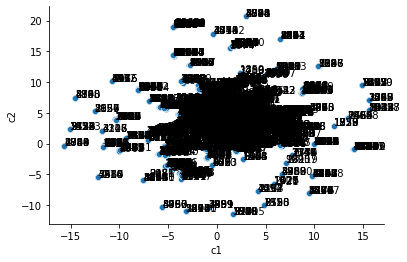

In [109]:
# Attempt to visualize UMAP
umap_5 = umap.UMAP(n_neighbors=5, min_dist=0.1, metric='euclidean')
ucs = umap_5.fit_transform(X_UMAP_scaled)

ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.index = X_UMAP.index
plot_components(ucs,'c1','c2')

/home/yaxiao/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/yaxiao/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/yaxiao/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for p

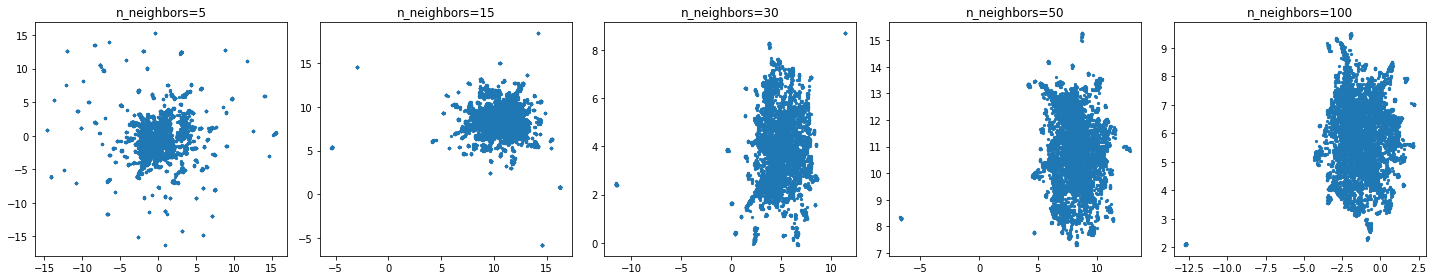

In [110]:
# List of parameters to try
values_of_n_neighbors = [5,10,15,20,30]
fig, axs = plt.subplots(1, len(values_of_n_neighbors), figsize=(20, 4))

# Plot UMAP plots to visualize local and global structures
for i, n in enumerate(values_of_n_neighbors):
    reducer = umap.UMAP(n_neighbors=n, n_components=2, random_state=99)
    embedding = reducer.fit_transform(X_UMAP_scaled)
    axs[i].scatter(embedding[:, 0], embedding[:, 1], s=5)
    axs[i].set_title(f'n_neighbors={n}')
plt.tight_layout()